<a href="https://colab.research.google.com/github/rhshovon102/Predicting-Women-s-Diabetes-Disease-Using-Machine-Learning/blob/main/Predicting_Women's_Diabetes_Disease_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **Load Dataset**

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/8th Semester/DataMining&MachineLearning/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1




# **Preprocessing**

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [26]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# **Normalization**

In [27]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df.iloc[:,0:8] = mms.fit_transform(df.iloc[:,0:8])

In [28]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1


# **Visualization**

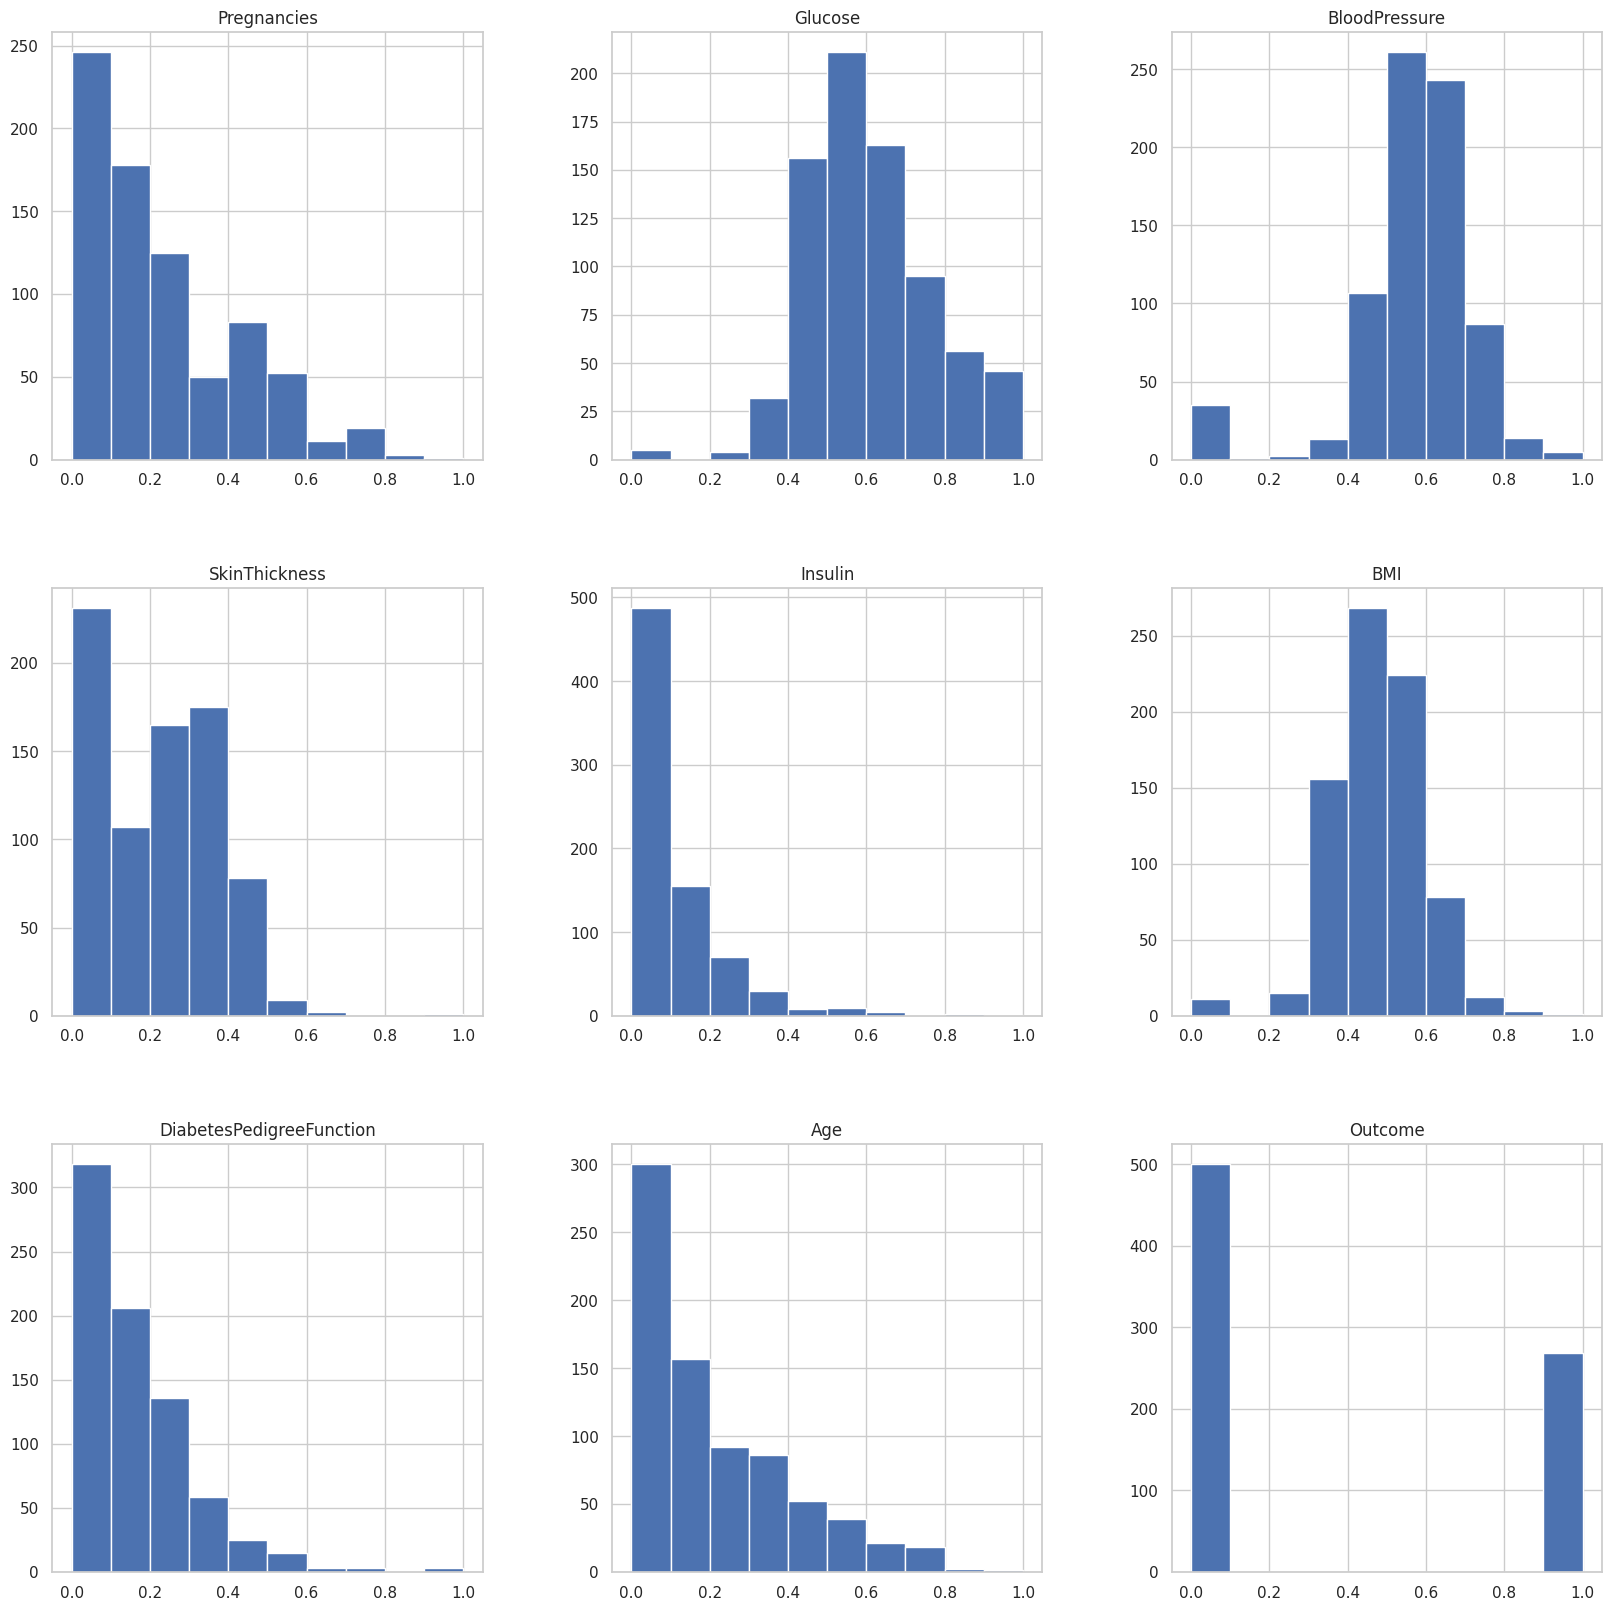

In [29]:
import matplotlib.pyplot as plt
df.hist(figsize=(20, 20))
plt.show()

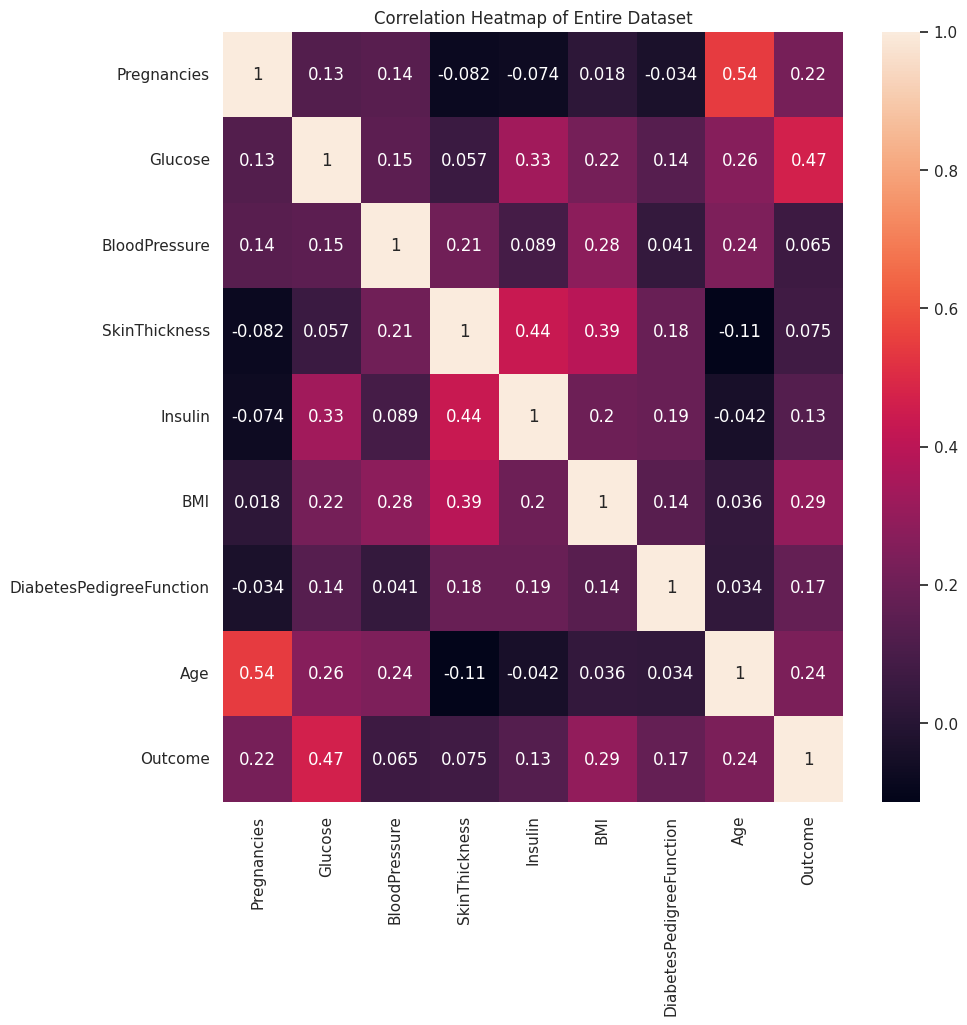

In [30]:
import seaborn as sns
plt.figure(figsize=(10, 10))
p = sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Heatmap of Entire Dataset")
plt.show()

**Detect and Remove Outliers**

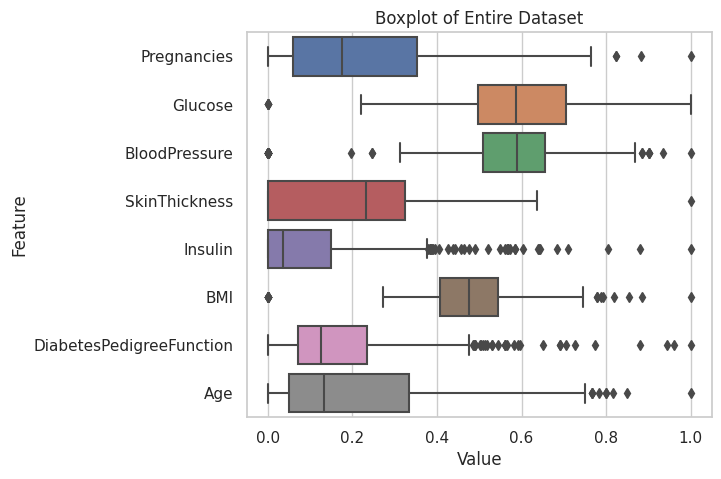

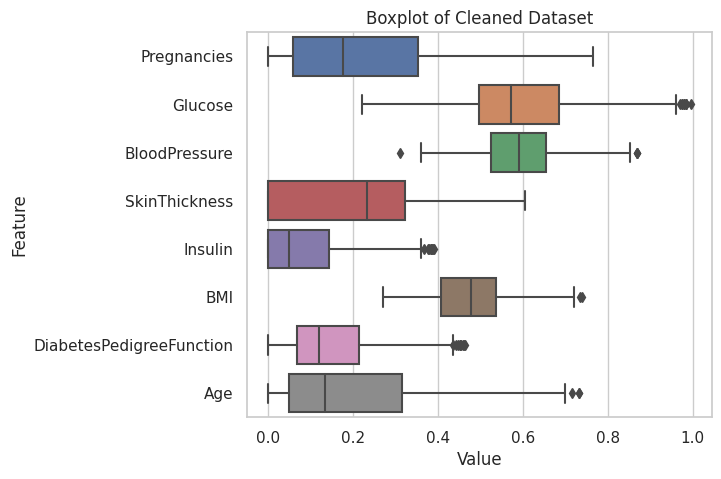

In [31]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 5))
data = df.iloc[:, 0:8]
sns.boxplot(data, orient="h")
plt.xlabel("Value")
plt.ylabel("Feature")
plt.title("Boxplot of Entire Dataset")
plt.show()

def remove_outliers(df, columns, threshold=1.5):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

columns_to_remove_outliers = df.iloc[:,0:8]
df = remove_outliers(df, columns_to_remove_outliers)

plt.figure(figsize=(6, 5))
sns.boxplot(df.iloc[:,0:8], orient="h")
plt.xlabel("Value")
plt.ylabel("Feature")
plt.title("Boxplot of Cleaned Dataset")
plt.show()


# **Principle Component Analysis**

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principal_components = pca.fit_transform(df.iloc[:,0:8])

# **Several Algorithms Implementation**




**Algorithm Evaluation Function of Balanced Data**

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE


accuracy_values = []
precision_values = []


def evaluate_algorithm(model, x, y):
    smote = SMOTE()
    x_resampled, y_resampled = smote.fit_resample(x, y)

    scores = cross_val_score(model, x_resampled, y_resampled, cv=5)
    print("Individual fold scores:", scores)

    mean_score = scores.mean()
    std_deviation = scores.std()
    print("Mean score:", mean_score)
    print("Standard Deviation:", std_deviation)

    predicted_labels = cross_val_predict(model, x_resampled, y_resampled, cv=5)

    conf_matrix = confusion_matrix(y_resampled, predicted_labels)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['Not Diabetic', 'Diabetic'], yticklabels=['Not Diabetic', 'Diabetic'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    accuracy = accuracy_score(y_resampled, predicted_labels)
    accuracy_values.append(accuracy)
    precision = precision_score(y_resampled, predicted_labels)
    precision_values.append(precision)
    recall = recall_score(y_resampled, predicted_labels)
    f1 = f1_score(y_resampled, predicted_labels)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)




**LogisticRegression**

Individual fold scores: [0.68181818 0.73295455 0.75       0.71428571 0.74857143]
Mean score: 0.7255259740259741
Standard Deviation: 0.025384913372951838


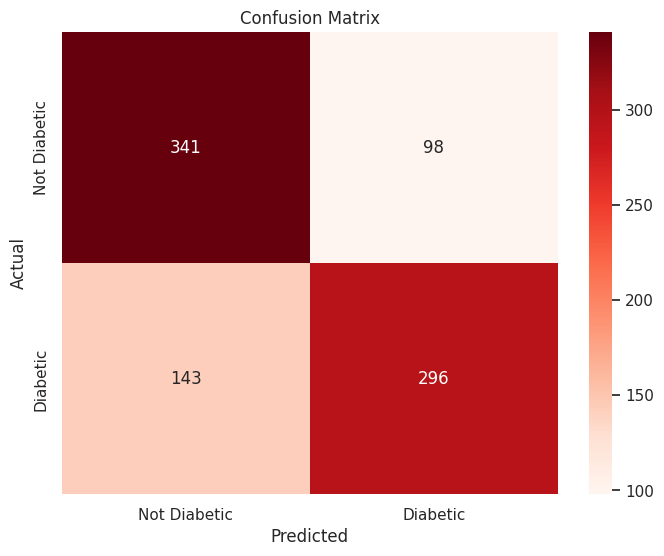

Accuracy: 0.7255125284738041
Precision: 0.751269035532995
Recall: 0.6742596810933941
F1 Score: 0.7106842737094838


In [34]:
from sklearn.linear_model import LogisticRegression

x = principal_components
y = df.Outcome

lr = LogisticRegression()
evaluate_algorithm(lr, x, y)



**KNN**

Individual fold scores: [0.80113636 0.76704545 0.80681818 0.82285714 0.85714286]
Mean score: 0.8109999999999999
Standard Deviation: 0.02938209010188467


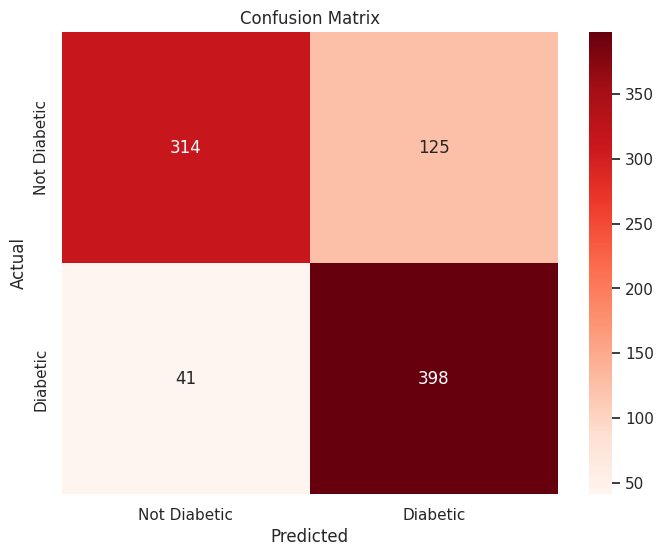

Accuracy: 0.8109339407744874
Precision: 0.7609942638623327
Recall: 0.9066059225512528
F1 Score: 0.8274428274428274


In [35]:
from sklearn.neighbors import KNeighborsClassifier

x = principal_components
y = df.Outcome

knn = KNeighborsClassifier(n_neighbors=3)
evaluate_algorithm(knn, x, y)


**NaiveBayes**

Individual fold scores: [0.71590909 0.72159091 0.75       0.72       0.77142857]
Mean score: 0.7357857142857143
Standard Deviation: 0.021532397035900465


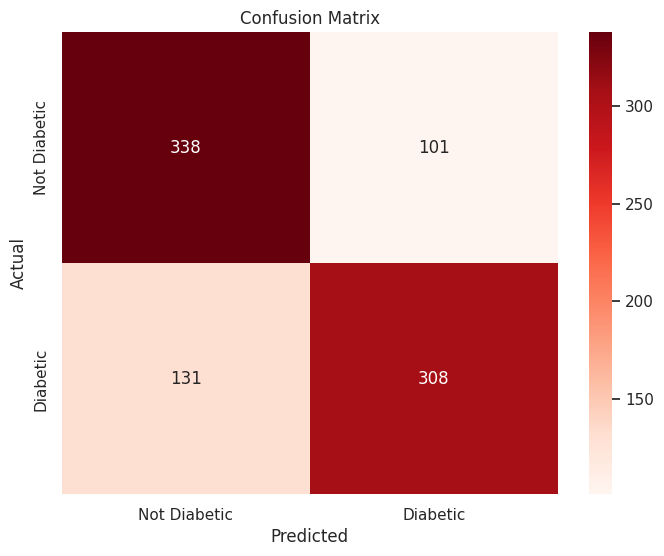

Accuracy: 0.7357630979498861
Precision: 0.7530562347188264
Recall: 0.7015945330296127
F1 Score: 0.7264150943396227


In [36]:
from sklearn.naive_bayes import GaussianNB

x = principal_components
y = df.Outcome

nb = GaussianNB()
evaluate_algorithm(nb, x, y)



**DecisionTree**

Individual fold scores: [0.71590909 0.70454545 0.82386364 0.81714286 0.84      ]
Mean score: 0.7802922077922078
Standard Deviation: 0.05780002865511073


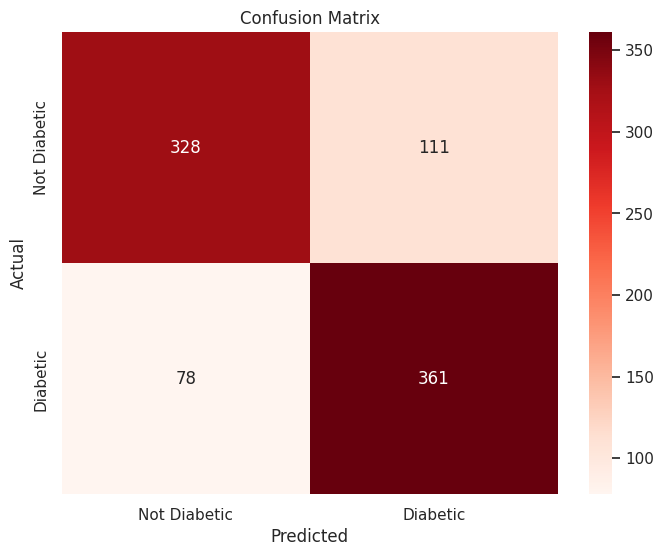

Accuracy: 0.784738041002278
Precision: 0.7648305084745762
Recall: 0.8223234624145785
F1 Score: 0.7925356750823271


In [37]:
from sklearn.tree import DecisionTreeClassifier

x = principal_components
y = df.Outcome

dt = DecisionTreeClassifier(criterion='gini', max_depth=None)
evaluate_algorithm(dt, x, y)

 **RandomForest**

Individual fold scores: [0.79545455 0.76704545 0.84659091 0.88       0.86857143]
Mean score: 0.8315324675324675
Standard Deviation: 0.04337726202967122


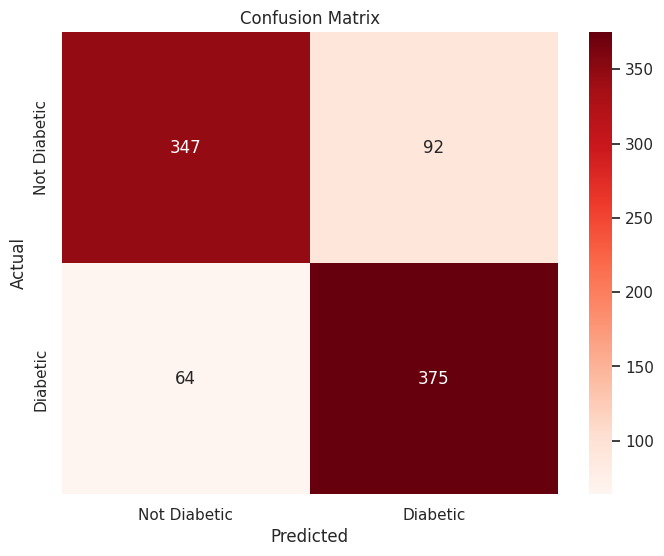

Accuracy: 0.8223234624145785
Precision: 0.8029978586723768
Recall: 0.8542141230068337
F1 Score: 0.8278145695364238


In [38]:
from sklearn.ensemble import RandomForestClassifier

x = principal_components
y = df.Outcome

rf = RandomForestClassifier(n_estimators=100)

evaluate_algorithm(rf, x, y)

# **AdaBoostClassifier**

Individual fold scores: [0.71022727 0.72727273 0.77840909 0.76       0.74857143]
Mean score: 0.7448961038961038
Standard Deviation: 0.02398861082155978


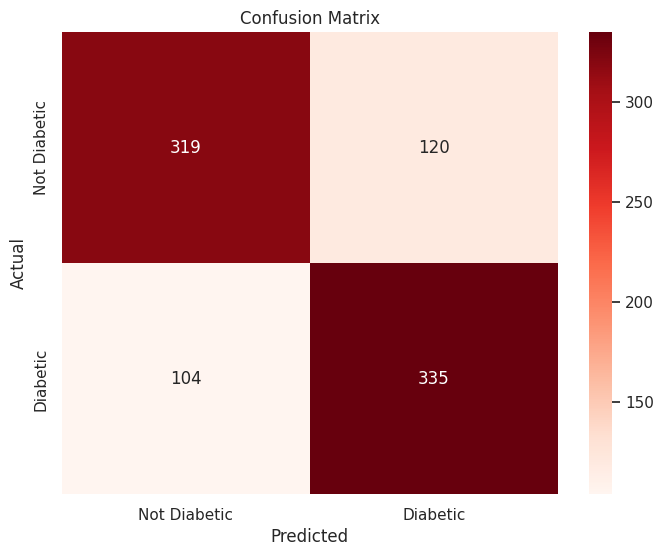

Accuracy: 0.744874715261959
Precision: 0.7362637362637363
Recall: 0.7630979498861048
F1 Score: 0.7494407158836689


In [39]:
from sklearn.ensemble import AdaBoostClassifier

x = principal_components
y = df.Outcome

ada_boost = AdaBoostClassifier(n_estimators=50)

evaluate_algorithm(ada_boost, x, y)

# **GradientBoosting**

Individual fold scores: [0.76136364 0.74431818 0.82386364 0.85142857 0.86857143]
Mean score: 0.8099090909090909
Standard Deviation: 0.04902794095994103


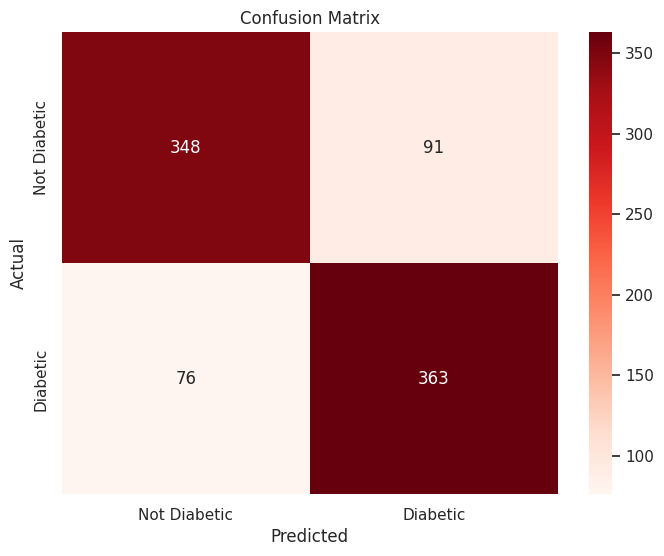

Accuracy: 0.8097949886104784
Precision: 0.7995594713656388
Recall: 0.826879271070615
F1 Score: 0.8129899216125421


In [40]:
from sklearn.ensemble import GradientBoostingClassifier

x = principal_components
y = df.Outcome

gradient_boost = GradientBoostingClassifier(n_estimators=100, random_state=42)

evaluate_algorithm(gradient_boost, x, y)

# **BaggingClassifier**

Individual fold scores: [0.77272727 0.72159091 0.85227273 0.87428571 0.85142857]
Mean score: 0.814461038961039
Standard Deviation: 0.05786515751913339


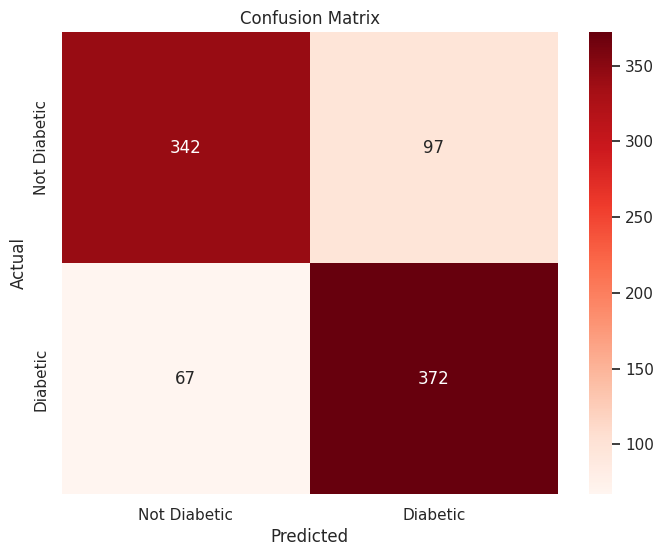

Accuracy: 0.8132118451025057
Precision: 0.7931769722814499
Recall: 0.8473804100227791
F1 Score: 0.8193832599118942


In [41]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

x = principal_components
y = df.Outcome

base_model = DecisionTreeClassifier()
bagging_classifier = BaggingClassifier(base_model, n_estimators=50)

evaluate_algorithm(bagging_classifier, x, y)

**Accuracy And Precision Difference of above Algorithms**

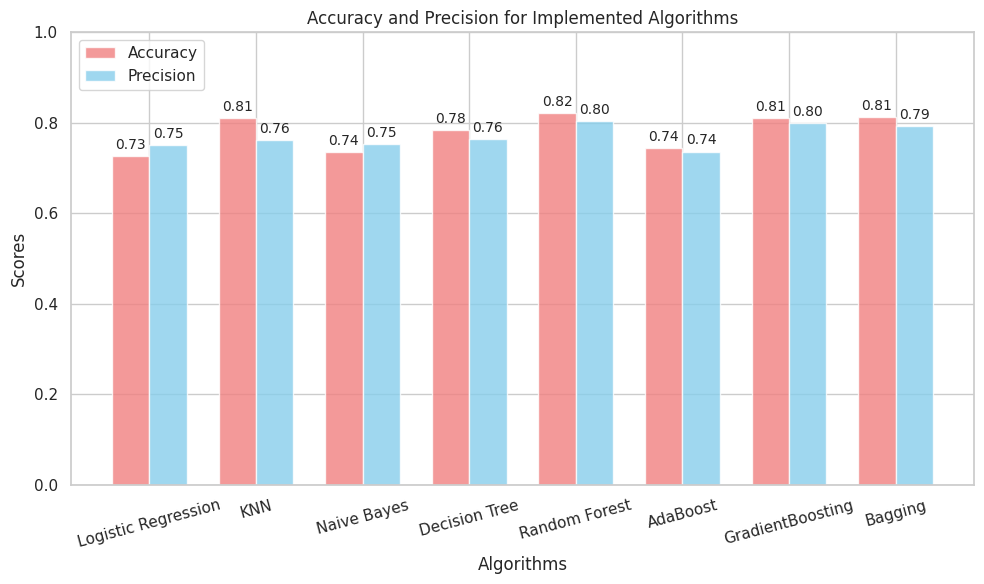

In [42]:
import numpy as np
import matplotlib.pyplot as plt

algorithms = ['Logistic Regression', 'KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'AdaBoost', 'GradientBoosting', 'Bagging']

bar_width = 0.35
bar_positions = np.arange(len(algorithms))

fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(bar_positions, accuracy_values, bar_width, label='Accuracy', color='lightcoral', alpha=0.8)

bar2 = ax.bar(bar_positions + bar_width, precision_values, bar_width, label='Precision', color='skyblue', alpha=0.8)

ax.set_xlabel('Algorithms')
ax.set_ylabel('Scores')
ax.set_title('Accuracy and Precision for Implemented Algorithms')
ax.set_xticks(bar_positions + bar_width / 2)
ax.set_xticklabels(algorithms, rotation=15)
ax.set_ylim(0, 1)
ax.legend(loc='upper left')

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('%.2f' % height,
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

autolabel(bar1)
autolabel(bar2)

plt.tight_layout()
plt.show()
